In [1]:
pip install nfl_data_py nflfastpy

     |████████████████████████████████| 51 kB 315 kB/s 
     |████████████████████████████████| 1.5 MB 20.3 MB/s 
     |████████████████████████████████| 56 kB 1.6 MB/s 
     |████████████████████████████████| 12.3 MB 20.1 MB/s 
     |████████████████████████████████| 251 kB 45.5 MB/s 
     |████████████████████████████████| 1.6 MB 38.6 MB/s 
     |████████████████████████████████| 140 kB 44.2 MB/s 
     |████████████████████████████████| 48 kB 5.1 MB/s 
     |████████████████████████████████| 45.0 MB 127 kB/s 
     |████████████████████████████████| 339 kB 46.1 MB/s 
     |████████████████████████████████| 341 kB 34.8 MB/s 
     |████████████████████████████████| 10.1 MB 25.4 MB/s 
     |████████████████████████████████| 87 kB 1.3 MB/s 
     |████████████████████████████████| 361 kB 44.7 MB/s 
  Created wheel for nfl-data-py: filename=nfl_data_py-0.2.6-py3-none-any.whl size=9741 sha256=70a0788c75766f371f24ea6b9c302b114153166d941559dcf3322ce91a31083f
  Stored in directory: /root/.cache

In [2]:
import pandas as pd
import nfl_data_py as nfl
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

In [3]:
df = nfl.import_pbp_data([2015,2021])

2015 done.
2021 done.
Downcasting floats.


In [5]:
passing_df_filters = (df['pass_attempt'] == 1) & (df['two_point_attempt'] == 0)
passing_df = df.loc[passing_df_filters, ['pass_attempt', 'pass_touchdown', 'yardline_100']]
passing_df_probs = passing_df.groupby('yardline_100')['pass_touchdown'].value_counts(normalize=True)
passing_df_probs = pd.DataFrame({
    'probability_of_touchdown': passing_df_probs.values
}, index=passing_df_probs.index).reset_index()
passing_df_probs = passing_df_probs.loc[passing_df_probs['pass_touchdown'] == 1, ['yardline_100', 'probability_of_touchdown']]
passing_df_probs.head()

,yardline_100,probability_of_touchdown
0,1.0,0.520737
3,2.0,0.485849
5,3.0,0.380342
7,4.0,0.386364
9,5.0,0.396364


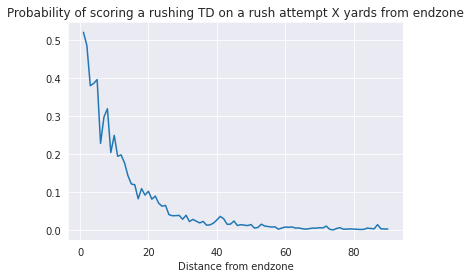

In [6]:
plt.plot(passing_df_probs['yardline_100'], passing_df_probs['probability_of_touchdown']);
plt.title('Probability of scoring a rushing TD on a rush attempt X yards from endzone');
plt.xlabel('Distance from endzone');

In [7]:
df_2021 = nfl.import_pbp_data([2021])

2021 done.
Downcasting floats.


In [9]:
roster_2021 = nfl.import_rosters([2022])
qbs = roster_2021.loc[roster_2021['position'] == 'QB']
qbs.head()

,season,team,position,depth_chart_position,jersey_number,status,player_name,first_name,last_name,birth_date,...,espn_id,sportradar_id,yahoo_id,rotowire_id,pff_id,pfr_id,fantasy_data_id,sleeper_id,years_exp,headshot_url
63,2022,ARI,QB,QB,12,Active,Colt McCoy,Colt,McCoy,1986-09-05,...,13199.0,3699dfd9-d437-43f7-b674-adbb31e7e64b,24060.0,6444.0,5609.0,McCoCo00,11047.0,533,12.0,https://static.www.nfl.com/image/private/f_aut...
64,2022,ARI,QB,QB,1,Active,Kyler Murray,Kyler,Murray,1997-08-07,...,3917315.0,dd5a6b6e-ffae-45a5-b8e6-718a9251f374,31833.0,13613.0,38334.0,MurrKy00,20889.0,5849,3.0,https://static.www.nfl.com/image/private/f_aut...
65,2022,ARI,QB,NaN,16,Active,Jarrett Guarantano,Jarrett,Guarantano,1997-11-04,...,NaN,7493b890-d554-11ec-addb-6dd6dcd40f21,NaN,16617.0,NaN,NaN,NaN,8442,0.0,NaN
66,2022,ARI,QB,QB,19,Active,Trace McSorley,Trace,McSorley,1995-08-23,...,3116172.0,d4d135fd-b710-4c12-9082-9d6e544b3f8d,32029.0,13752.0,32819.0,McSoTr00,20874.0,5974,3.0,https://static.www.nfl.com/image/private/f_aut...
165,2022,ATL,QB,NaN,4,Active,Desmond Ridder,Desmond,Ridder,1999-08-31,...,NaN,6bf35760-217c-401d-b80b-2ae7cc5d7564,NaN,15928.0,NaN,NaN,NaN,8159,0.0,NaN


In [10]:
df_2021.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50712 entries, 0 to 50711
Data columns (total 372 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    play_id                               float32
 1    game_id                               object 
 2    old_game_id                           object 
 3    home_team                             object 
 4    away_team                             object 
 5    season_type                           object 
 6    week                                  int32  
 7    posteam                               object 
 8    posteam_type                          object 
 9    defteam                               object 
 10   side_of_field                         object 
 11   yardline_100                          float32
 12   game_date                             object 
 13   quarter_seconds_remaining             float32
 14   half_seconds_remaining                float32
 15   

In [13]:
#
passing_df_2021 = df_2021.loc[df_2021['pass_attempt'] == 1, 
['passer_id', 'passer_player_name', 'pass_attempt','pass_touchdown', 'yardline_100']]
passing_df_2021.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21086 entries, 3 to 50709
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passer_id           21012 non-null  object 
 1   passer_player_name  21086 non-null  object 
 2   pass_attempt        21086 non-null  float32
 3   pass_touchdown      21086 non-null  float32
 4   yardline_100        21086 non-null  float32
dtypes: float32(3), object(2)
memory usage: 741.3+ KB


In [14]:
passing_df_2021 = passing_df_2021.merge(passing_df_probs, how='left', on='yardline_100')
passing_df_2021 = passing_df_2021.groupby('passer_id', as_index=False).agg({
    'passer_player_name': 'first', 'pass_touchdown': 'sum', 'probability_of_touchdown': 'sum'
}).rename({
    'probability_of_touchdown': 'expected_touchdowns', 'pass_touchdown': 'actual_touchdowns'
}, axis=1)
passing_df_2021.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   passer_id            125 non-null    object 
 1   passer_player_name   125 non-null    object 
 2   actual_touchdowns    125 non-null    float32
 3   expected_touchdowns  125 non-null    float64
dtypes: float32(1), float64(1), object(2)
memory usage: 3.5+ KB


In [15]:


passing_df_2021['positive_regression_candidate'] = passing_df_2021['actual_touchdowns'] < passing_df_2021['expected_touchdowns']
passing_df_2021['delta'] = passing_df_2021.apply(lambda x: abs(x.expected_touchdowns - x.actual_touchdowns), axis=1)
passing_df_2021.sort_values(by='expected_touchdowns', ascending=False).head()

,passer_id,passer_player_name,actual_touchdowns,expected_touchdowns,positive_regression_candidate,delta
68,00-0033873,P.Mahomes,48.0,46.046575,False,1.953425
0,00-0019596,T.Brady,46.0,44.860797,False,1.139203
11,00-0026498,M.Stafford,50.0,44.480099,False,5.519901
84,00-0034857,J.Allen,45.0,42.239538,False,2.760462
112,00-0036355,J.Herbert,38.0,41.363163,True,3.363163


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


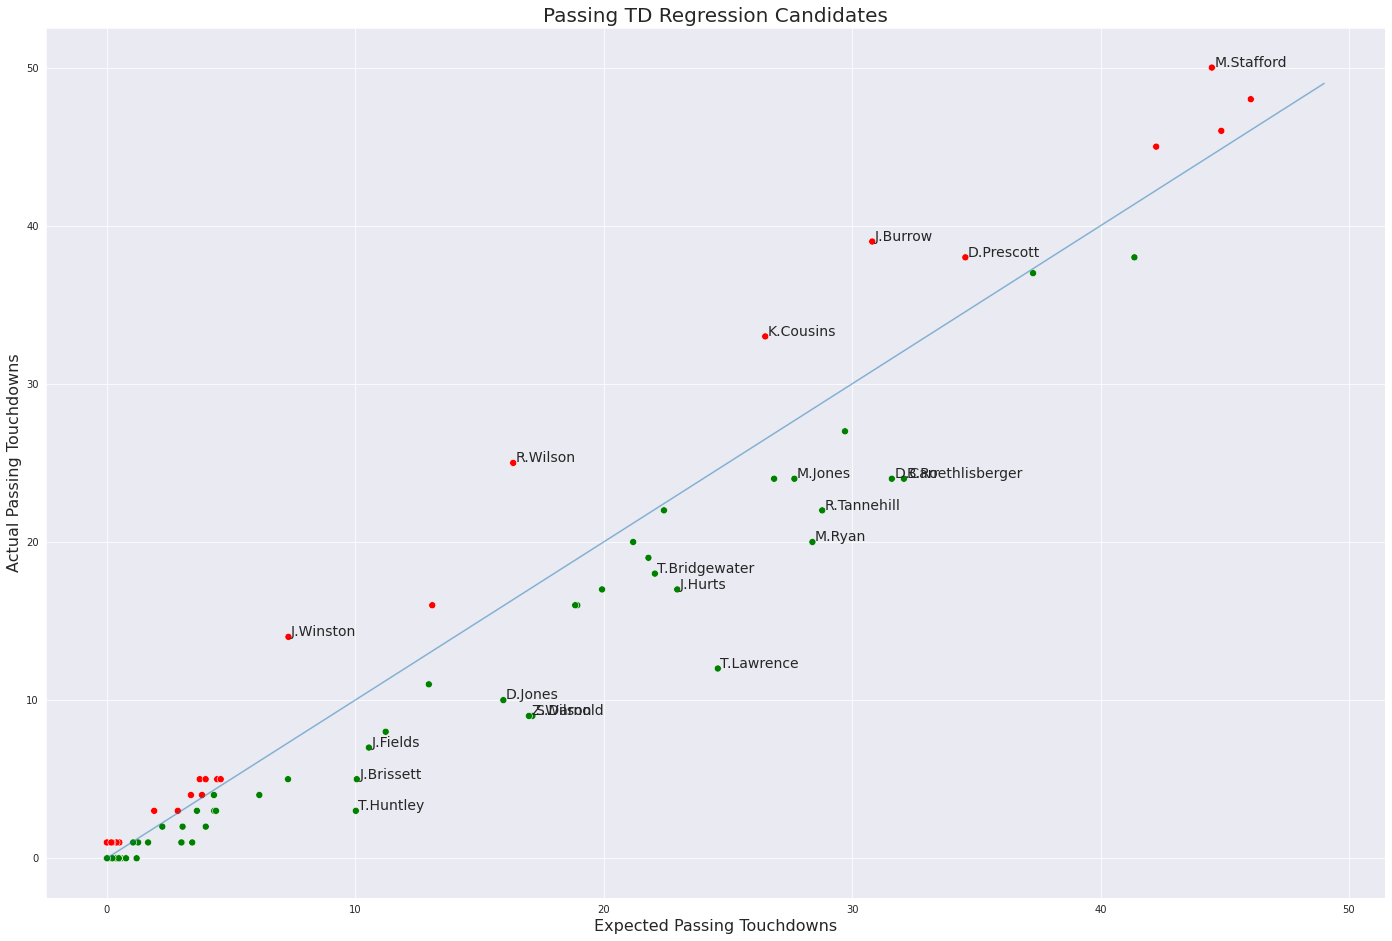

In [16]:
fig, ax = plt.subplots(figsize=(24, 16))
sns.scatterplot(
    x = 'expected_touchdowns',
    y = 'actual_touchdowns',
    hue = 'positive_regression_candidate',
    data = passing_df_2021,
    palette = ['r', 'g'], # red and green,
    s=50
);

max_act_touchdowns = int(passing_df_2021['actual_touchdowns'].max()) # max touchdowns
max_exp_touchdowns = int(passing_df_2021['expected_touchdowns'].max()) # max expected touchdowns

max_tds = max(max_act_touchdowns, max_exp_touchdowns) # max of actual and expected tds

sns.lineplot(range(max_tds), range(max_tds), alpha=0.5); # plotting a line with slope of 1 up to max_tds number. This is the blue line on our viz

#15 players with the highest delta between expected and actual TDs (negative or positive)
top_x_delta = passing_df_2021.sort_values(by='delta', ascending=False)[:20]

for _, row in top_x_delta.iterrows(): 
    ax.text(
        x = row['expected_touchdowns']+0.1, # add a bit of spacing from the point in the x-direction
        y = row['actual_touchdowns'] + .05, # same but in the y-direction
        s = row['passer_player_name'], # annotate with the player's name,
        fontsize=14
    )
ax.get_legend().remove()
ax.set_title('Passing TD Regression Candidates', fontsize=20)
ax.set_xlabel('Expected Passing Touchdowns', fontsize=16)
ax.set_ylabel('Actual Passing Touchdowns', fontsize=16);

In [21]:
top_x_delta.loc[top_x_delta['positive_regression_candidate'] == True].sort_values(by=['expected_touchdowns'], ascending=False)

,passer_id,passer_player_name,actual_touchdowns,expected_touchdowns,positive_regression_candidate,delta
2,00-0022924,B.Roethlisberger,24.0,32.087132,True,8.087132
37,00-0031280,D.Carr,24.0,31.599809,True,7.599809
25,00-0029701,R.Tannehill,22.0,28.797124,True,6.797124
7,00-0026143,M.Ryan,20.0,28.403894,True,8.403894
122,00-0036972,M.Jones,24.0,27.677839,True,3.677839
121,00-0036971,T.Lawrence,12.0,24.596496,True,12.596496
113,00-0036389,J.Hurts,17.0,22.963095,True,5.963095
36,00-0031237,T.Bridgewater,18.0,22.062759,True,4.062759
86,00-0034869,S.Darnold,9.0,17.133775,True,8.133775
124,00-0037013,Z.Wilson,9.0,16.993974,True,7.993974


In [22]:
top_x_delta.loc[top_x_delta['positive_regression_candidate'] == False].sort_values(by=['expected_touchdowns'], ascending=False)

,passer_id,passer_player_name,actual_touchdowns,expected_touchdowns,positive_regression_candidate,delta
11,00-0026498,M.Stafford,50.0,44.480099,False,5.519901
56,00-0033077,D.Prescott,38.0,34.559751,False,3.440249
114,00-0036442,J.Burrow,39.0,30.811708,False,8.188292
23,00-0029604,K.Cousins,33.0,26.505259,False,6.494741
21,00-0029263,R.Wilson,25.0,16.361141,False,8.638859
41,00-0031503,J.Winston,14.0,7.315655,False,6.684345
